In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data = pd.read_excel('dataset.xlsx')
data.head()

,Temperature,Yield
0,102,58
1,98,40
2,94,47
3,92,44
4,100,61


In [8]:
x = data['Temperature']
y = data['Yield']

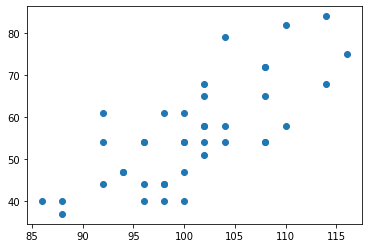

In [9]:
plt.scatter(x,y)

In [10]:
def linear_regression(x, y):     
    N = len(x)
    x_mean = x.mean()
    y_mean = y.mean()
    
    B1_num = ((x - x_mean) * (y - y_mean)).sum()
    B1_den = ((x - x_mean)**2).sum()
    B1 = B1_num / B1_den
    
    B0 = y_mean - (B1*x_mean)
    
    reg_line = 'y = {} + {}β'.format(B0, round(B1, 3))
    
    return (B0, B1, reg_line)

In [11]:
N = len(x)
x_mean = x.mean()
y_mean = y.mean()

In [15]:
B1_num = ((x - x_mean) * (y - y_mean)).sum()
B1_den = ((x - x_mean)**2).sum()
B1 = B1_num / B1_den

B1

1.2676607186506967

In [16]:
B0 = y_mean - (B1 * x_mean)

B0

-71.8168174040577

## Calculating How Well The Regression Line Fits

In [17]:
def corr_coef(x, y):
    N = len(x)
    
    num = (N * (x*y).sum()) - (x.sum() * y.sum())
    den = np.sqrt((N * (x**2).sum() - x.sum()**2) * (N * (y**2).sum() - y.sum()**2))
    R = num / den
    return R

In [18]:
B0, B1, reg_line = linear_regression(x, y)
print('Regression Line: ', reg_line)
R = corr_coef(x, y)
print('Correlation Coef.: ', R)
print('"Goodness of Fit": ', R**2)

Regression Line:  y = -71.8168174040577 + 1.268β
Correlation Coef.:  0.7449204768913036
"Goodness of Fit":  0.5549065168919671


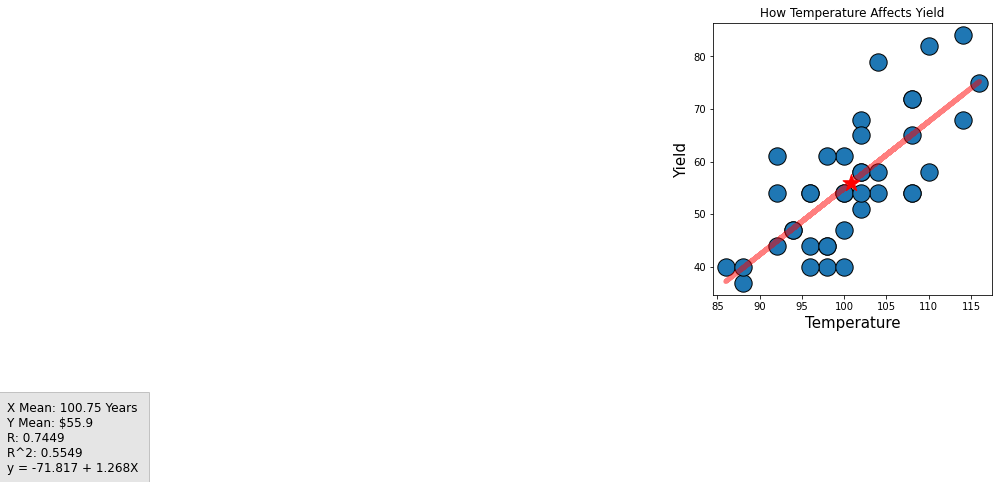

In [29]:
plt.figure(figsize=(5,5))
plt.scatter(x, y, s=300, linewidths=1, edgecolor='black')
text = '''X Mean: {} Years
Y Mean: ${}
R: {}
R^2: {}
y = {} + {}X'''.format(round(x.mean(), 2), 
                       round(y.mean(), 2), 
                       round(R, 4), 
                       round(R**2, 4),
                       round(B0, 3),
                       round(B1, 3))
plt.text(x=1, y=1, s=text, fontsize=12, bbox={'facecolor': 'grey', 'alpha': 0.2, 'pad': 10})
plt.title('How Temperature Affects Yield')
plt.xlabel('Temperature', fontsize=15)
plt.ylabel('Yield', fontsize=15)
plt.plot(x, B0 + B1*x, c = 'r', linewidth=5, alpha=.5, solid_capstyle='round')
plt.scatter(x=x.mean(), y=y.mean(), marker='*', s=10**2.5, c='r') # average point

In [24]:
def predict(B0, B1, new_x):
    y = B0 + B1 * new_x
    return y
predict(-71.81, 1.268, 115)

74.00999999999999